# Plotting Kannada dataframe

In [15]:
import regex as re, pandas as pd
import platform
import mplcairo
import matplotlib as mpl
if platform.system() == "Darwin":
    mpl.use("module://mplcairo.macosx")
else:
   mpl.use("module://mplcairo.qt")
import matplotlib.pyplot as plt


In [16]:
PAGE = "https://kn.wikipedia.org/wiki/%E0%B2%AD%E0%B2%BE%E0%B2%B0%E0%B2%A4%E0%B2%A6_%E0%B2%9C%E0%B2%A8%E0%B2%A4%E0%B3%86"
tables = pd.read_html(PAGE, encoding="utf-8", header=0)


In [17]:
tables[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ವರ್ಷ            12 non-null     int64  
 1   ಒಟ್ಟು ಜನಸಂಖ್ಯೆ  12 non-null     int64  
 2   ಗ್ರಾಮ           12 non-null     object 
 3   ನಗರ             11 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 512.0+ bytes


In [18]:
df = tables[0]
df =  df.iloc[:-1 , :]
def clean_labels(s):
    s = re.sub(r'[\p{Pd}\p{Ps}\p{Pe}\p{Pi}\p{Pf}\p{Po}]+','',s)
    s = re.sub(r'\p{Z}+', '_', s)
    s = re.sub(r'^_|_$', '', s)
    return s

data = df.copy()
data.rename(clean_labels, axis=1, inplace=True)
data[['ನಗರ', 'ಗ್ರಾಮ']] = data[['ನಗರ', 'ಗ್ರಾಮ']].astype('int64')

In [19]:
data

,ವರ್ಷ,ಒಟ್ಟು_ಜನಸಂಖ್ಯೆ,ಗ್ರಾಮ,ನಗರ
0,1901,238396327,212544454,25851573
1,1911,252093390,226151757,25941633
2,1921,251351213,223235043,28086170
3,1931,278977238,245521249,33455686
4,1941,318660580,275507283,44153297
5,1951,362088090,298644381,62443709
6,1961,439234771,360298168,78936603
7,1971,548159652,439045675,109113677
8,1981,683329097,623866550,159462547
9,1991,846302688,628691676,217611012


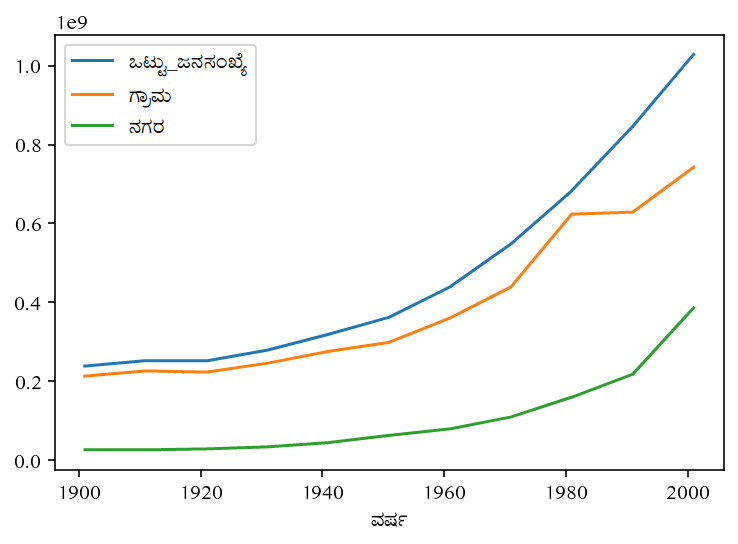

In [20]:
plt.rcParams.update({'font.family':'Kannada MN'})
data.plot(x='ವರ್ಷ', y = ['ಒಟ್ಟು_ಜನಸಂಖ್ಯೆ', 'ಗ್ರಾಮ', 'ನಗರ'])
plt.show()